In [1]:
import pandas as pd
import numpy as np

In [5]:
Data = pd.read_csv('./3. AI모델/Validation.csv')

In [61]:
Data_1 = Data.drop(['kw', 'Device','Fs'],axis= 1)
Data_1

,label,Hz,watt,amp,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,CrestFactor,ShapeFactor,ImpulseFactor,f_1x,f_2x,f_3x,f_4x
0,정상,1765,11.0,21.8,0.035460,1.798991e-05,0.068645,0.010578,-0.009104,-0.408253,6.489473,587.988308,1971.126704,0.000075,0.000020,0.000026,0.000051
1,정상,1765,11.0,21.8,0.032741,1.523867e-05,0.067869,0.010341,-0.072318,-0.368908,6.562832,678.625277,2148.549430,0.000243,0.000014,0.000014,0.000017
2,정상,1765,11.0,21.8,0.031707,2.977132e-07,0.065556,0.010311,-0.009879,-0.316460,6.357589,34635.515037,106501.414281,0.000188,0.000043,0.000004,0.000026
3,정상,1765,11.0,21.8,0.033400,1.078510e-05,0.069339,0.010286,-0.001335,-0.318043,6.741275,953.703074,3096.902431,0.000179,0.000096,0.000020,0.000064
4,정상,1765,11.0,21.8,0.030603,9.765376e-06,0.069113,0.010337,-0.097589,-0.306831,6.685803,1058.564530,3133.820459,0.000220,0.000128,0.000021,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126707,축정렬불량,1750,7.5,15.2,0.023022,2.529498e-08,0.044968,0.007105,-0.002156,-0.605130,6.329329,280875.844310,910130.628712,0.000218,0.000065,0.000097,0.000112
126708,축정렬불량,1750,7.5,15.2,0.021253,2.582349e-06,0.044944,0.007035,0.002902,-0.619300,6.388937,2724.125109,8230.276824,0.000233,0.000059,0.000045,0.000107
126709,축정렬불량,1750,7.5,15.2,0.021022,5.921988e-06,0.042180,0.007042,-0.000694,-0.625494,5.990156,1189.061944,3549.770443,0.000193,0.000033,0.000071,0.000048
126710,축정렬불량,1750,7.5,15.2,0.021888,1.299151e-05,0.043055,0.007047,0.003643,-0.604583,6.109865,542.419256,1684.797044,0.000161,0.000083,0.000062,0.000090


In [62]:
Data_1['label'].value_counts()

label
정상        57874
벨트느슨함     20698
축정렬불량     17677
베어링불량     16968
회전체불평형    13495
Name: count, dtype: int64

In [63]:
# 1. 라벨 별로 나누기
# 2. 정상 vs 고장으로 나눠서 해보기

label_dict = {'정상': 0, '베어링불량': 1, '회전체불평형': 2, '축정렬불량': 3, '벨트느슨함': 4}
Data_2 = Data_1.copy()
Data_2['label'] = Data_2['label'].map(label_dict)
Data_2.head()


,label,Hz,watt,amp,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,CrestFactor,ShapeFactor,ImpulseFactor,f_1x,f_2x,f_3x,f_4x
0,0,1765,11.0,21.8,0.035460,1.798991e-05,0.068645,0.010578,-0.009104,-0.408253,6.489473,587.988308,1971.126704,0.000075,0.000020,0.000026,0.000051
1,0,1765,11.0,21.8,0.032741,1.523867e-05,0.067869,0.010341,-0.072318,-0.368908,6.562832,678.625277,2148.549430,0.000243,0.000014,0.000014,0.000017
2,0,1765,11.0,21.8,0.031707,2.977132e-07,0.065556,0.010311,-0.009879,-0.316460,6.357589,34635.515037,106501.414281,0.000188,0.000043,0.000004,0.000026
3,0,1765,11.0,21.8,0.033400,1.078510e-05,0.069339,0.010286,-0.001335,-0.318043,6.741275,953.703074,3096.902431,0.000179,0.000096,0.000020,0.000064
4,0,1765,11.0,21.8,0.030603,9.765376e-06,0.069113,0.010337,-0.097589,-0.306831,6.685803,1058.564530,3133.820459,0.000220,0.000128,0.000021,0.000080


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [123]:
X = Data_2.drop(['label'], axis= 1)
Y = Data_2['label']

In [124]:
minmxax_sc = MinMaxScaler()
minmxax_sc.fit(X)
min_X = minmxax_sc.transform(X)

In [154]:
train_x, test_x, train_y, test_y = train_test_split(min_X, Y, stratify= Y, test_size= 0.3, random_state= 45)

# Random Forest

In [155]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)

predict_rf = rf.predict(test_x)


array([[17358,     0,     1,     1,     1],
       [    0,  5090,     0,     0,     0],
       [    0,     0,  4048,     0,     0],
       [    1,     0,     0,  5302,     0],
       [    3,     0,     0,     0,  6209]], dtype=int64)

In [158]:
print(f"RF train accuracy: {rf.score(train_x, train_y):.3f}")
print(f"RF test accuracy: {rf.score(test_x, test_y):.3f}")
print( round(accuracy_score(predict_rf, test_y),4))
confusion_matrix(predict_rf, test_y)

RF train accuracy: 1.000
RF test accuracy: 1.000
0.9998


array([[17358,     0,     1,     1,     1],
       [    0,  5090,     0,     0,     0],
       [    0,     0,  4048,     0,     0],
       [    1,     0,     0,  5302,     0],
       [    3,     0,     0,     0,  6209]], dtype=int64)

In [169]:
import random
minmxax_sc = MinMaxScaler()
minmxax_sc.fit(X)
minmax_X = minmxax_sc.transform(X)


train_x, test_x, train_y, test_y = train_test_split(minmax_X, Y, stratify= Y, test_size= 0.3, random_state= 45) 

rf = RandomForestClassifier()
rf.fit(train_x,train_y)

predict_rf = rf.predict(test_x)

print(f"RF train accuracy: {rf.score(train_x, train_y):.3f}")
print(f"RF test accuracy: {rf.score(test_x, test_y):.3f}")
print( round(accuracy_score(predict_rf, test_y),4))
confusion_matrix(predict_rf, test_y)

RF train accuracy: 1.000
RF test accuracy: 1.000
0.9998


array([[17359,     0,     1,     1,     2],
       [    0,  5090,     0,     0,     0],
       [    0,     0,  4048,     0,     0],
       [    1,     0,     0,  5302,     0],
       [    2,     0,     0,     0,  6208]], dtype=int64)

In [173]:
# 교차 검증
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits= 3, shuffle= True)
Acc_list = []


n_iter = 0

for train_idx, test_idx in kfold.split(minmax_X, Y):
    rf = RandomForestClassifier()
    train_x, test_x = minmax_X[train_idx], minmax_X[test_idx]
    train_y, test_y = Y[train_idx], Y[test_idx]
    
    
    rf.fit(train_x, train_y)
    predict_rf = rf.predict(test_x)


    n_iter += 1
    Acc = np.round( accuracy_score(predict_rf, test_y ),4)
    train_size = train_x.shape[0]
    test_size = test_x.shape[0]
    print(f"train size : {train_size}, test size : {test_size}, Accuracy : {Acc}")
    print(confusion_matrix(predict_rf, test_y))
Acc_list.append(Acc)

print(f"Mean Acc : {np.mean(Acc_list)}")

train size : 84474, test size : 42238, Accuracy : 0.9996
[[19285     0     2     1     6]
 [    0  5656     0     0     0]
 [    0     0  4496     0     0]
 [    0     0     0  5891     0]
 [    7     0     0     0  6894]]
train size : 84475, test size : 42237, Accuracy : 0.9999
[[19290     0     0     1     1]
 [    0  5656     0     0     0]
 [    0     0  4498     0     0]
 [    0     0     0  5892     0]
 [    1     0     0     0  6898]]
train size : 84475, test size : 42237, Accuracy : 0.9998
[[19287     2     0     0     4]
 [    0  5654     0     0     0]
 [    0     0  4499     0     0]
 [    2     0     0  5892     0]
 [    2     0     0     0  6895]]
Mean Acc : 0.9998


1. feature RMS (0.203)
2. feature P2P (0.125)
3. feature f_1x (0.100)
4. feature amp (0.088)
5. feature Skewness (0.084)
6. feature Hz (0.081)
7. feature Kurtosis (0.069)
8. feature AbsMax (0.068)
9. feature watt (0.068)
10. feature f_2x (0.046)
11. feature CrestFactor (0.024)
12. feature f_3x (0.024)
13. feature f_4x (0.016)
14. feature AbsMean (0.003)
15. feature ImpulseFactor (0.000)
16. feature ShapeFactor (0.000)


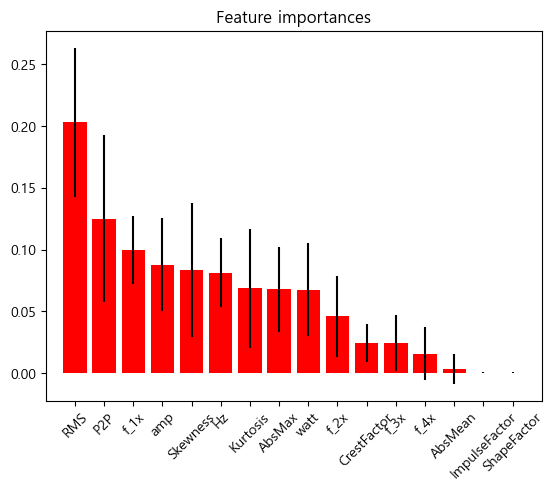

In [130]:
importances = rf.feature_importances_
std = np.std([values.feature_importances_ for values in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

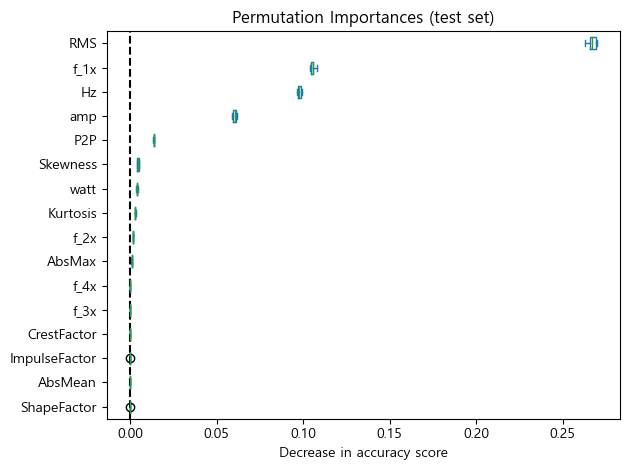

In [135]:
# 순열 중요도 Permutation Importance
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, test_x, test_y, n_repeats=10, random_state=2024, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

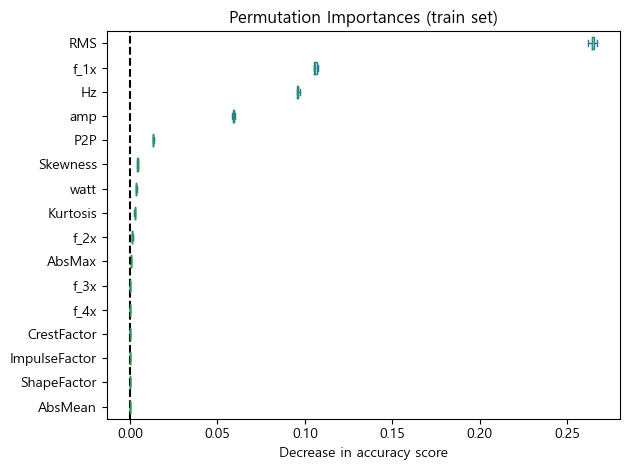

In [136]:
result = permutation_importance(
    rf, train_x, train_y, n_repeats=10, random_state=2024, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# 늦게보는 시각화

In [88]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
import seaborn as sns
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

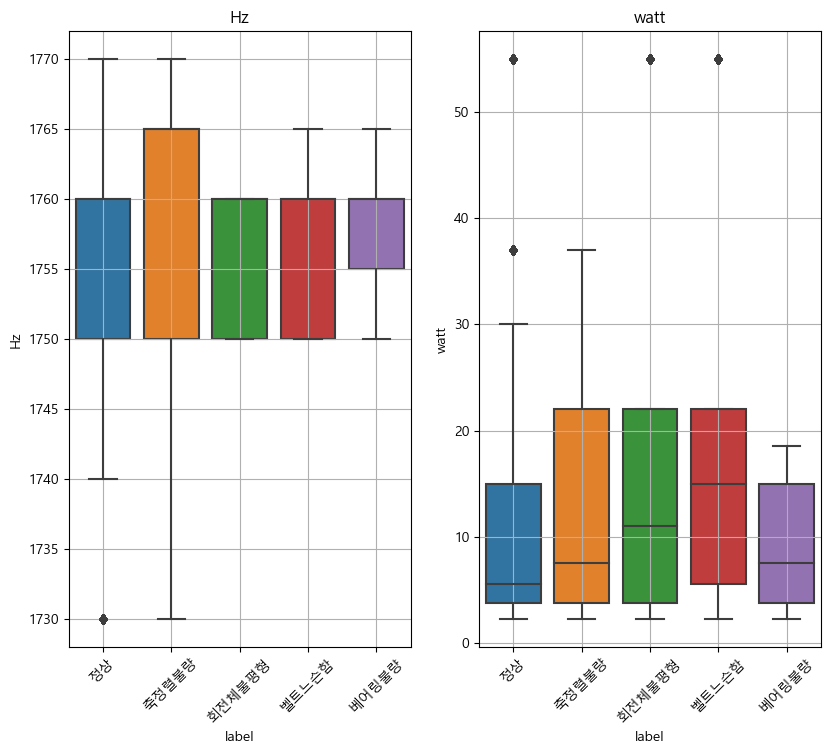

In [102]:
plt.figure(figsize= (15,8))
plt.subplot(1,3,1)
sns.boxplot(x = 'label', y= 'Hz', data = Data_1)
plt.title('Hz')
plt.grid()
plt.xticks(rotation = 45)

plt.subplot(1,3,2)
sns.boxplot(x = 'label', y= 'watt', data = Data_1)
plt.title('watt')
plt.grid()
plt.xticks(rotation = 45)

plt.show()



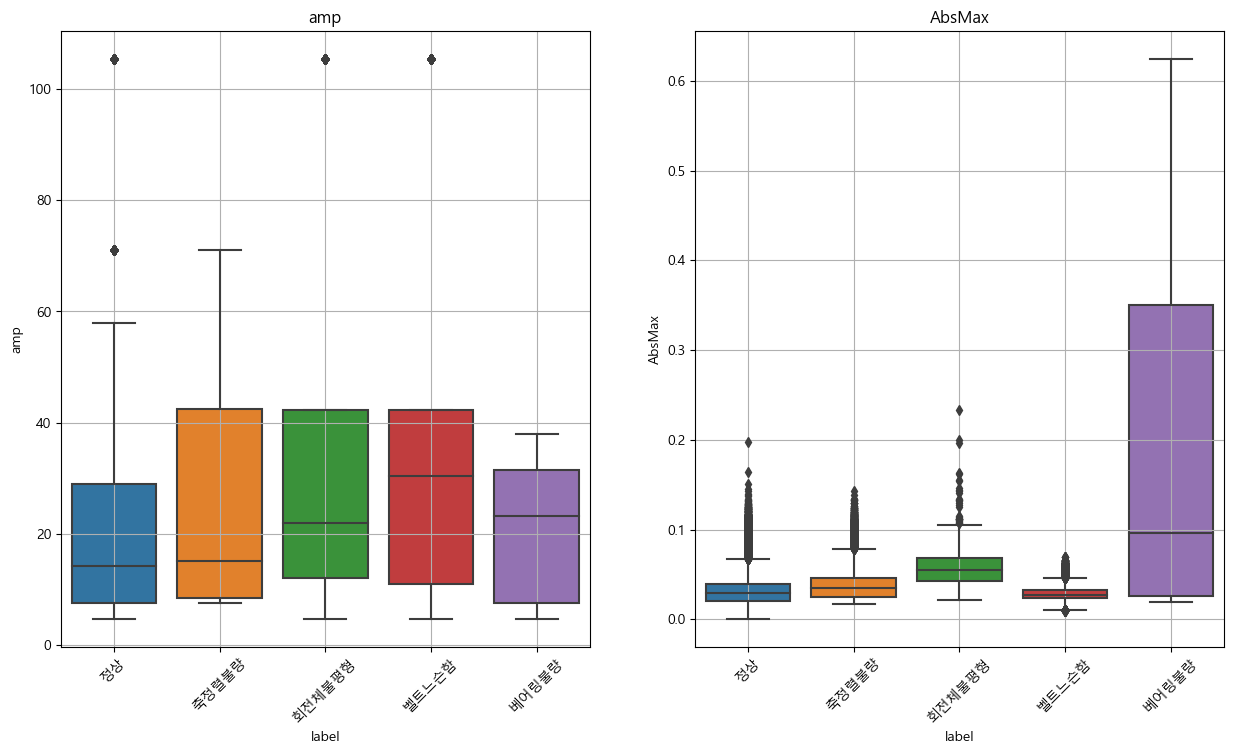

In [103]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'amp', data = Data_1)
plt.title('amp')
plt.grid()
plt.xticks(rotation = 45)
	
plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'AbsMax', data = Data_1)
plt.title('AbsMax')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

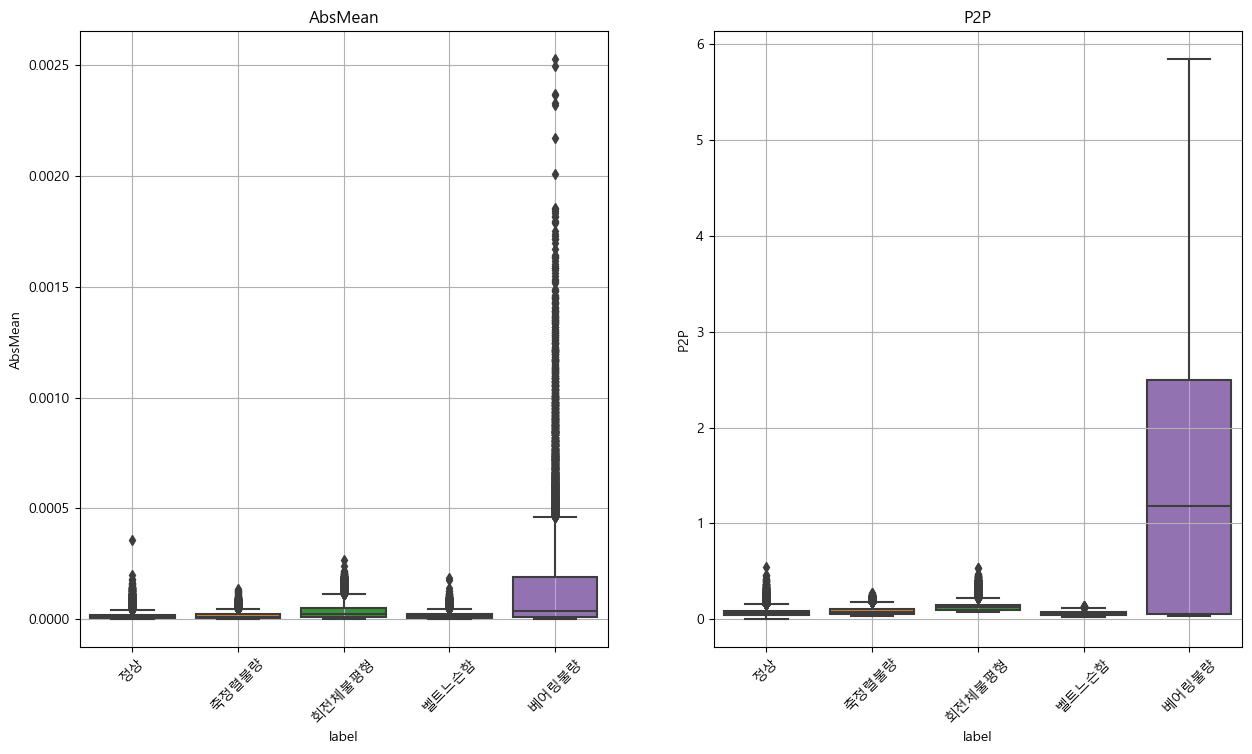

In [104]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'AbsMean', data = Data_1)
plt.title('AbsMean')
plt.grid()
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'P2P', data = Data_1)
plt.title('P2P')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

c:\Users\chzhf\anaconda3\envs\aivle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


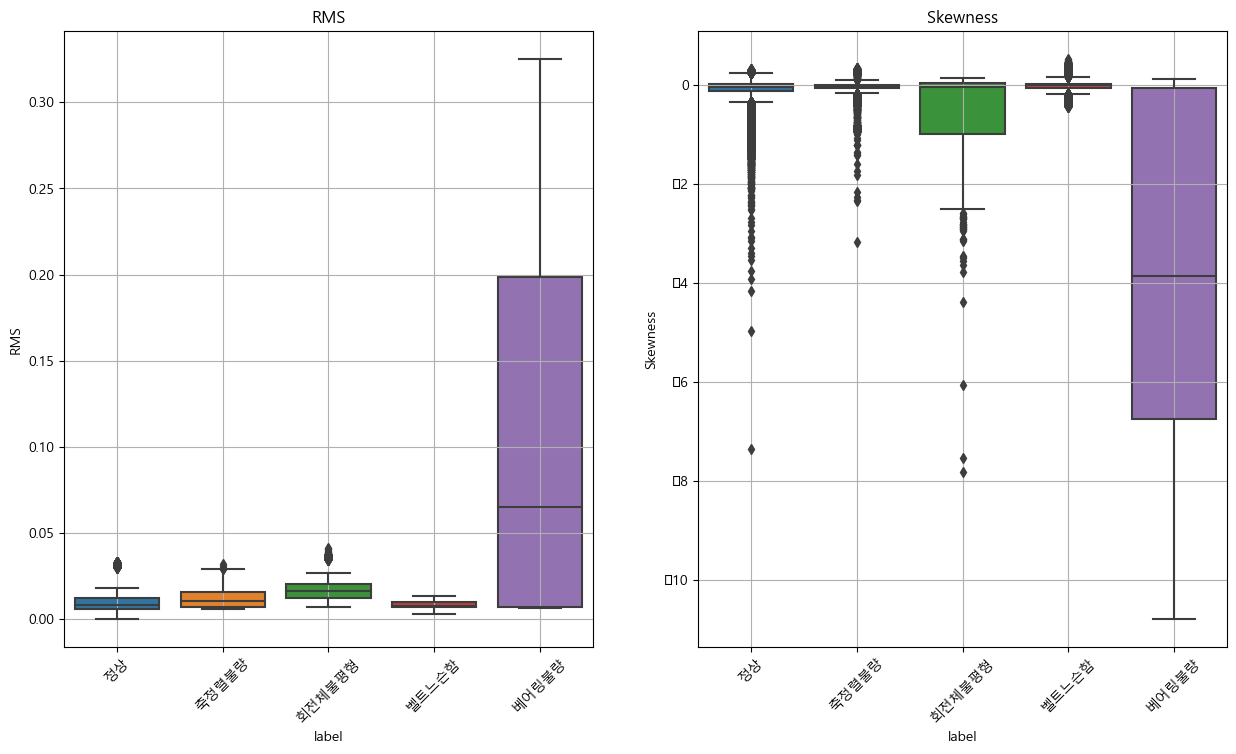

In [105]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'RMS', data = Data_1)
plt.title('RMS')
plt.grid()
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'Skewness', data = Data_1)
plt.title('Skewness')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

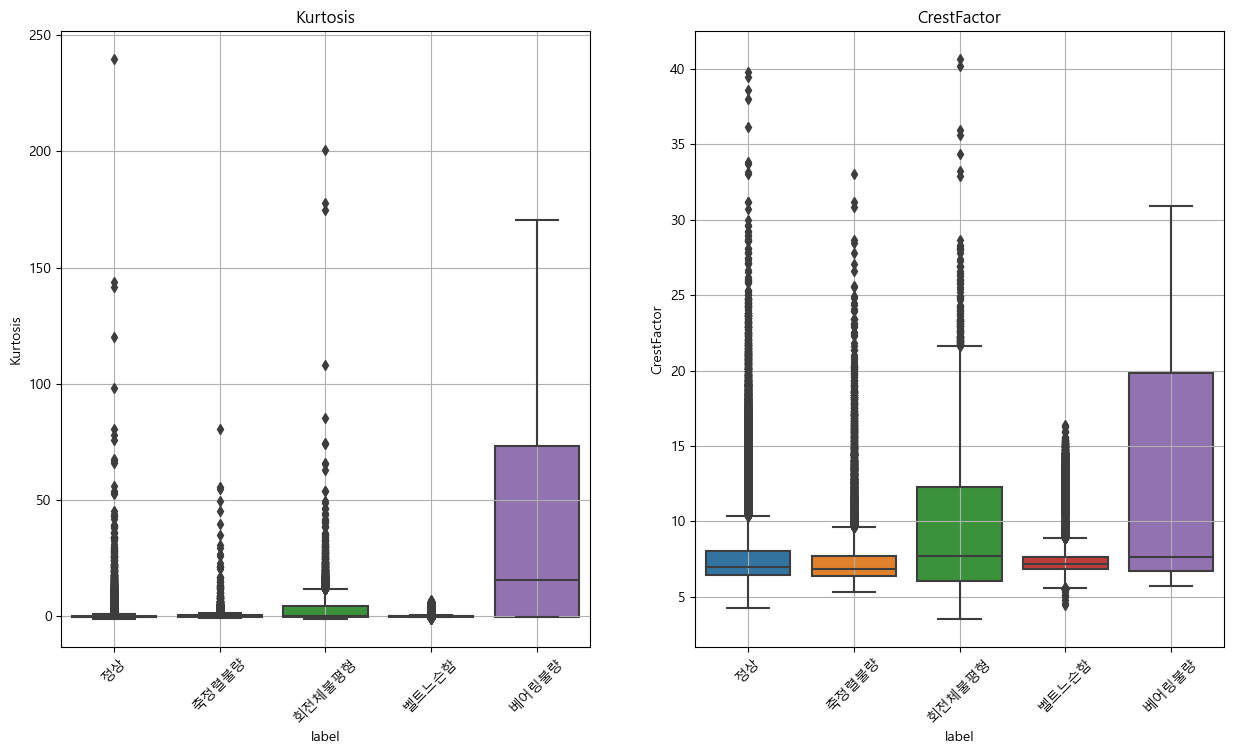

In [106]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'Kurtosis', data = Data_1)
plt.title('Kurtosis')
plt.grid()
plt.xticks(rotation = 45)	

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'CrestFactor', data = Data_1)
plt.title('CrestFactor')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

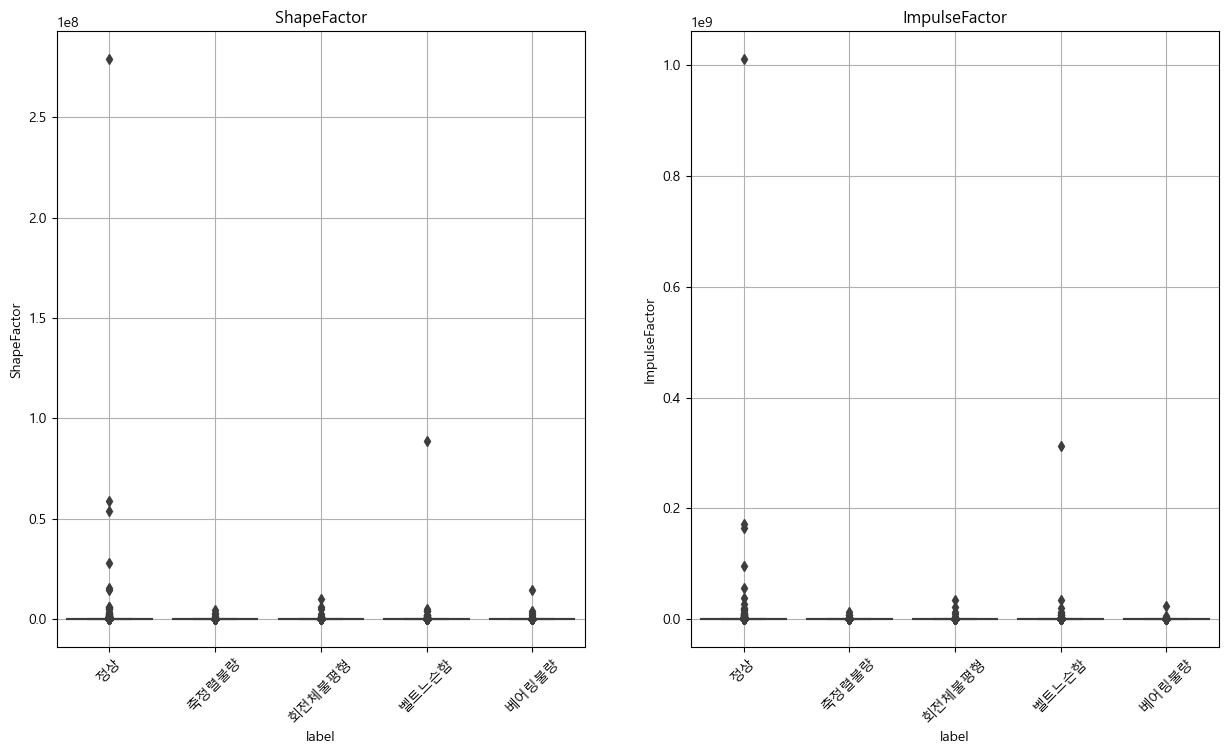

In [107]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'ShapeFactor', data = Data_1)
plt.title('ShapeFactor')
plt.grid()
plt.xticks(rotation = 45)	

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'ImpulseFactor', data = Data_1)
plt.title('ImpulseFactor')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

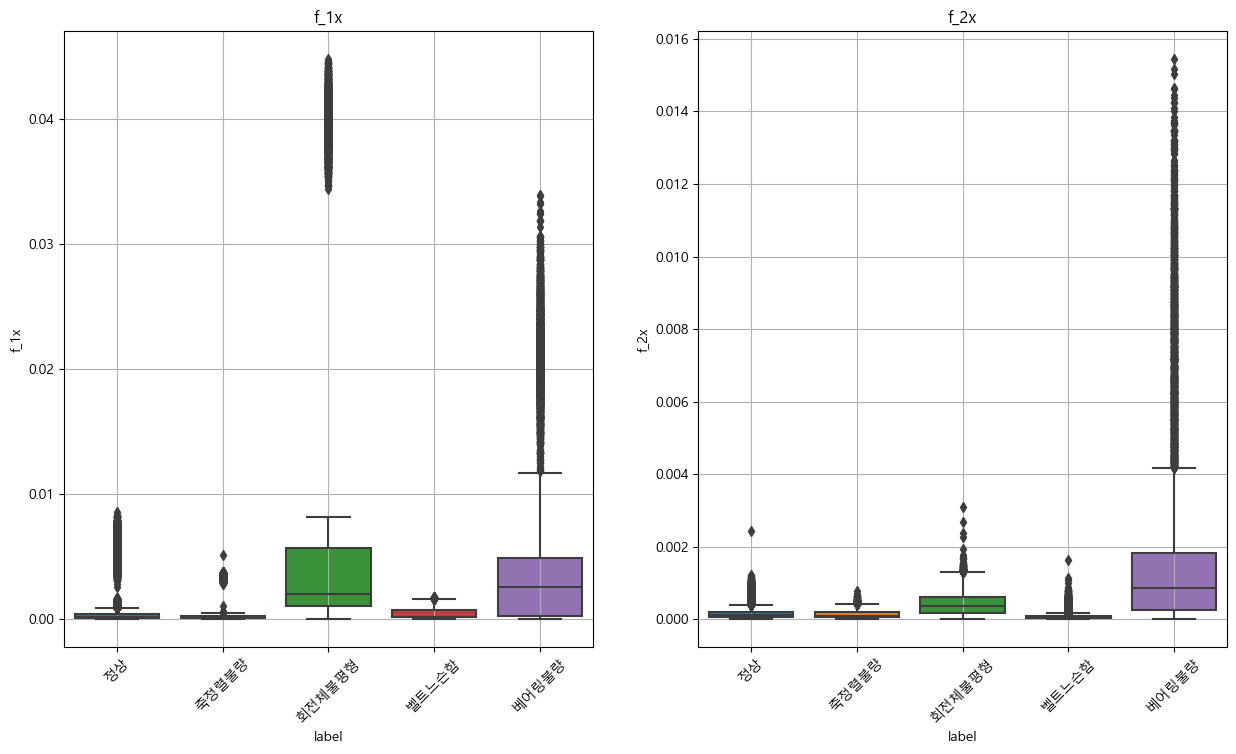

In [108]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'f_1x', data = Data_1)
plt.title('f_1x')
plt.grid()
plt.xticks(rotation = 45)	

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'f_2x', data = Data_1)
plt.title('f_2x')
plt.grid()
plt.xticks(rotation = 45)

plt.show()

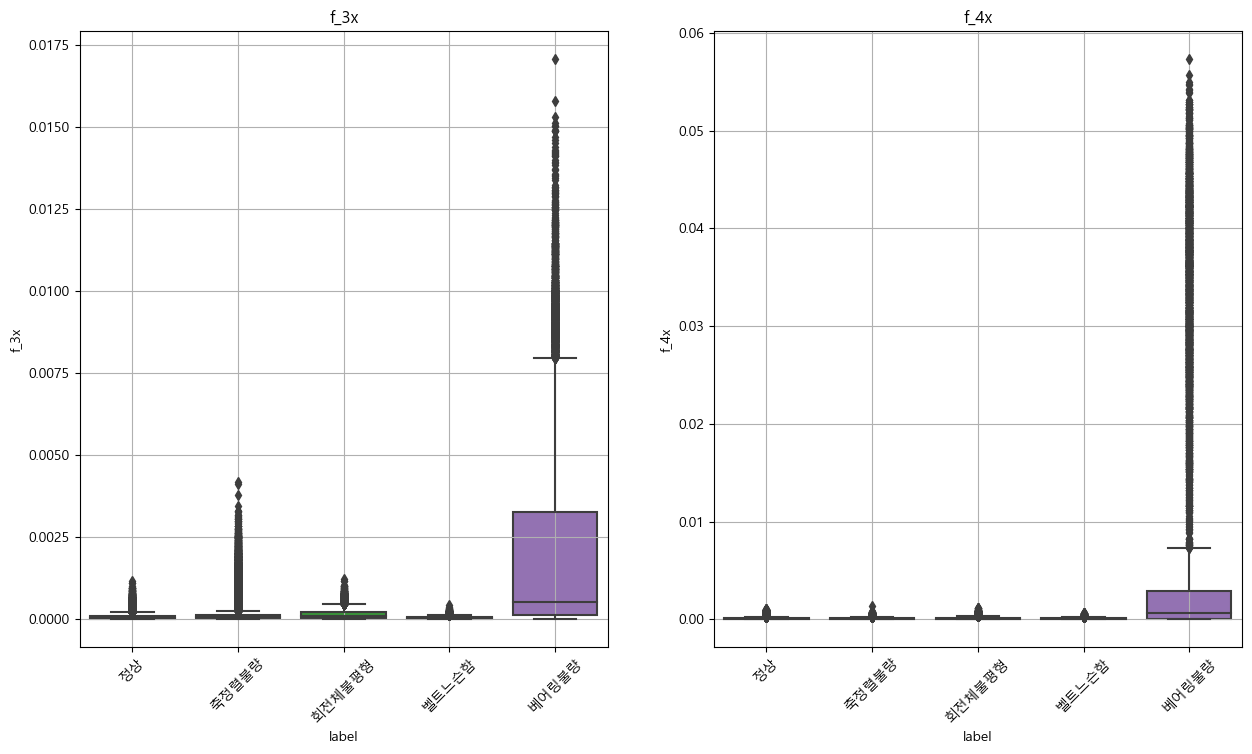

In [109]:
plt.figure(figsize= (15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'label', y= 'f_3x', data = Data_1)
plt.title('f_3x')
plt.grid()
plt.xticks(rotation = 45)	

plt.subplot(1,2,2)
sns.boxplot(x = 'label', y= 'f_4x', data = Data_1)
plt.title('f_4x')
plt.grid()
plt.xticks(rotation = 45)

plt.show()